# Marketing Campaign Analysis
---

## Overview
Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

## Objectives
Using the three datasets given:

1. Provide a quantitative assessment of whether the marketing campaign was successful. Explain why these metrics were choosen.

2. Based on the provided data, recommend ways the campaign strategy can be adjusted in the future to improve performance.

3. Explain how campaign performance might change if it were run in month 6 rather than month 3. Provide an incremental number versus your result in Question #1.

# Data Preprocessing
---

In [60]:
# import dependencies
import pandas as pd

In [61]:
# read in the data
calendar_df = pd.read_csv('./resources/datasets/calendar_data.csv')
client_df = pd.read_csv('./resources/datasets/client_data.csv')
deposit_df = pd.read_csv('./resources/datasets/deposit_data.csv')

In [62]:
# view client data
client_df.head()

,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [63]:
# view deposit data
deposit_df.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [64]:
# View calendar data
calendar_df.head()

,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


In [65]:
# Merge the data
df = pd.merge(client_df, deposit_df, on='client_id')
df = pd.merge(df, calendar_df, left_on='deposit_date', right_on="gregorian_date")
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2


In [66]:
# Drop greogorian date column
df = df.drop(columns=['gregorian_date'])

# View the data
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2


In [67]:
# Show columns with values that are null
df.isnull().sum()

client_id                     0
client_geographical_region    0
client_residence_status       0
client_age                    0
deposit_type                  0
deposit_amount                0
deposit_cadence               0
deposit_date                  0
month_name                    0
dtype: int64

# Exploratory Data Analysis
---

## Client Activity

In [68]:
# Print unique active clients each month
print(df.groupby('month_name').client_id.count())

# Print a space
print('')

# Print total number of unique clients
print(f'Total number of unique clients: {len(df.client_id.unique())}')

month_name
Month 1     77827
Month 2     80205
Month 3    108505
Month 4    107494
Month 5    106363
Name: client_id, dtype: int64

Total number of unique clients: 46347


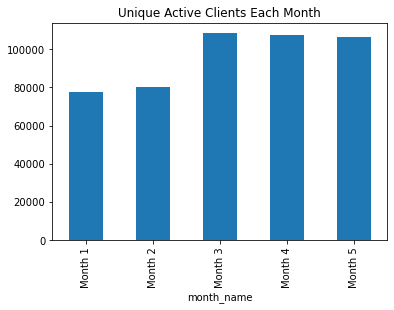

In [95]:
# Graph unique active clients each month
df.groupby('month_name').client_id.count().plot(kind='bar', title='Unique Active Clients Each Month')

## Regional Analysis

In [69]:
# Break down data by region
df.groupby('client_geographical_region').client_id.count()

client_geographical_region
Midwest       88185
Northeast     78576
South        108004
West         205629
Name: client_id, dtype: int64

In [71]:
# Calculate the month over month increase in active clients per region
df.groupby(['client_geographical_region', 'month_name']).client_id.count().unstack().pct_change(axis='columns') * 100

month_name,Month 1,Month 2,Month 3,Month 4,Month 5
client_geographical_region,,,,,
Midwest,NaN,3.398435,34.776679,0.480648,-0.745217
Northeast,NaN,3.151110,38.154748,-1.200514,-1.418560
South,NaN,2.167886,31.361589,-1.850781,-0.761849
West,NaN,3.356436,36.530015,-0.950134,-1.193106


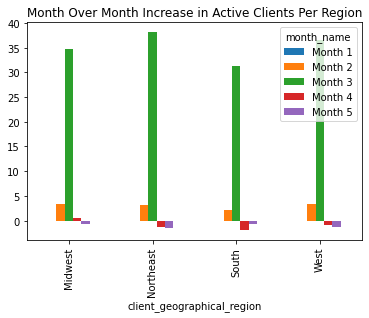

In [99]:
# Store the month over month increase in active clients per region in a variable
month_over_month_increase = df.groupby(['client_geographical_region', 'month_name']).client_id.count().unstack().pct_change(axis='columns') * 100

# Graph the month over month increase in active clients per region
month_over_month_increase.plot(kind='bar', title='Month Over Month Increase in Active Clients Per Region')



In [72]:
# View client residence data
df['client_residence_status'].value_counts()

Own     345432
Rent    134962
Name: client_residence_status, dtype: int64

In [75]:
# Calculate the month over month change in client residence status per region
df.groupby(['client_geographical_region', 'client_residence_status', 'month_name']).client_id.count().unstack().pct_change(axis='columns')*100

month_name                                          Month 1   Month 2  \
client_geographical_region client_residence_status                      
Midwest                    Own                          NaN  2.707711   
                           Rent                         NaN  4.899329   
Northeast                  Own                          NaN  3.362723   
                           Rent                         NaN  2.417348   
South                      Own                          NaN  1.301083   
                           Rent                         NaN  3.675577   
West                       Own                          NaN  2.814803   
                           Rent                         NaN  4.995127   

month_name                                            Month 3   Month 4  \
client_geographical_region client_residence_status                        
Midwest                    Own                      37.890938 -0.109043   
                           Rent                     28.150992  1.830587   
Northeast                  Own                      38.147193 -1.493395   
                           Rent                     38.181187 -0.175835   
South                      Own                      35.048703 -3.568009   
                           Rent                     25.095224  1.299918   
West                       Own                      38.543788 -1.749922   
                           Rent                     30.563936  1.564166   

month_name                                           Month 5  
client_geographical_region client_residence_status            
Midwest                    Own                     -0.953351  
                           Rent                    -0.277823  
Northeast                  Own                     -1.355685  
                           Rent                    -1.635632  
South                      Own                     -0.529521  
                           Rent                    -1.167630  
West                       Own                     -1.392645  
                           Rent                    -0.586279

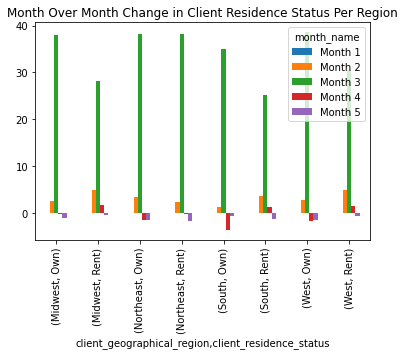

In [100]:
# Store the month over month change in client residence status per region in a variable
month_over_month_residence = df.groupby(['client_geographical_region', 'client_residence_status', 'month_name']).client_id.count().unstack().pct_change(axis='columns')*100

# Graph the month over month change in client residence status per region
month_over_month_residence.plot(kind='bar', title='Month Over Month Change in Client Residence Status Per Region')

## Client Age Analysis

In [76]:
# View client age data
df['client_age'].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

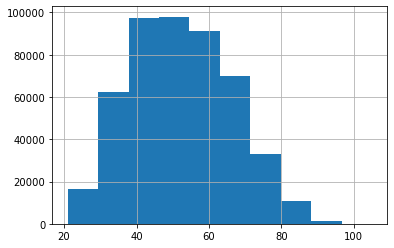

In [77]:
# View client age as histogram
df['client_age'].hist()

# Client Deposit Analysis

In [79]:
# View month over month deposit type by region
df.groupby(['client_geographical_region', 'deposit_type', 'month_name']).deposit_type.count().unstack().pct_change(axis='columns')*100

month_name                                    Month 1   Month 2    Month 3  \
client_geographical_region deposit_type                                      
Midwest                    Actual Deposit         NaN  4.030738  34.076655   
                           Scheduled Deposit      NaN  2.799890  35.447263   
Northeast                  Actual Deposit         NaN  3.733553  38.163945   
                           Scheduled Deposit      NaN  2.605210  38.146034   
South                      Actual Deposit         NaN  2.651077  30.449983   
                           Scheduled Deposit      NaN  1.723771  32.207113   
West                       Actual Deposit         NaN  3.705574  35.877770   
                           Scheduled Deposit      NaN  3.034884  37.134635   

month_name                                     Month 4   Month 5  
client_geographical_region deposit_type                           
Midwest                    Actual Deposit     1.340956 -1.046261  
                           Scheduled Deposit -0.335140 -0.454950  
Northeast                  Actual Deposit    -0.550838 -1.592430  
                           Scheduled Deposit -1.816204 -1.251661  
South                      Actual Deposit    -0.380392 -0.650872  
                           Scheduled Deposit -3.196455 -0.866367  
West                       Actual Deposit     0.058239 -1.249161  
                           Scheduled Deposit -1.876312 -1.140605

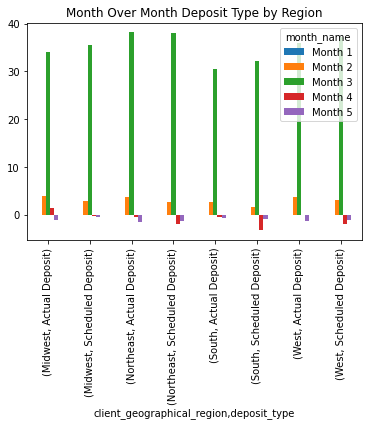

In [102]:
# Store month over month deposit type by region in a variable
month_over_month_deposit = df.groupby(['client_geographical_region', 'deposit_type', 'month_name']).deposit_type.count().unstack().pct_change(axis='columns')*100

# Graph month over month deposit type by region
month_over_month_deposit.plot(kind='bar', title='Month Over Month Deposit Type by Region')

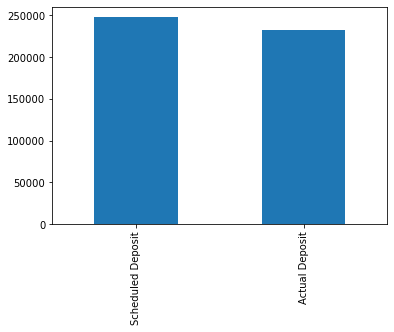

In [93]:
# View the deposit type as a bar chart
df['deposit_type'].value_counts().plot(kind='bar')

In [80]:
# View month over month deposit cadence by region
df.groupby(['client_geographical_region', 'deposit_cadence', 'month_name']).deposit_cadence.count().unstack().pct_change(axis='columns')*100

month_name                                  Month 1    Month 2    Month 3  \
client_geographical_region deposit_cadence                                  
Midwest                    Biweekly             NaN   3.225327  33.966883   
                           Extra                NaN  32.142857  51.351351   
                           Monthly              NaN   2.782752  34.955100   
Northeast                  Biweekly             NaN   3.127102  37.691555   
                           Extra                NaN  24.342105  92.592593   
                           Monthly              NaN   2.675120  37.033133   
South                      Biweekly             NaN   3.023699  28.291909   
                           Extra                NaN  17.803030  68.488746   
                           Monthly              NaN   1.169703  32.467779   
West                       Biweekly             NaN   3.948517  34.641483   
                           Extra                NaN   6.846473  85.436893   
                           Monthly              NaN   2.834051  36.623578   

month_name                                    Month 4   Month 5  
client_geographical_region deposit_cadence                       
Midwest                    Biweekly          2.214101 -0.315457  
                           Extra           -16.326531 -5.182927  
                           Monthly          -0.466779 -1.007783  
Northeast                  Biweekly         -0.153919 -1.399265  
                           Extra           -17.582418 -1.666667  
                           Monthly          -1.516650 -1.428412  
South                      Biweekly         -0.144270 -0.526316  
                           Extra           -12.213740 -6.086957  
                           Monthly          -2.647017 -0.749559  
West                       Biweekly          1.007949 -0.869297  
                           Extra           -15.183246 -0.246914  
                           Monthly          -1.862014 -1.465427

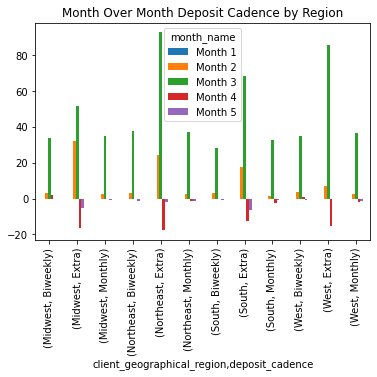

In [103]:
# Store month over month deposit cadence by region in a variable
month_over_month_cadence = df.groupby(['client_geographical_region', 'deposit_cadence', 'month_name']).deposit_cadence.count().unstack().pct_change(axis='columns')*100

# Graph month over month deposit cadence by region
month_over_month_cadence.plot(kind='bar', title='Month Over Month Deposit Cadence by Region')

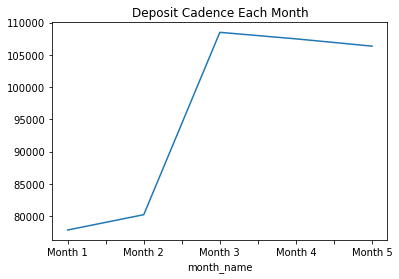

In [104]:
# Graph the deposit cadence each month
df.groupby('month_name').deposit_cadence.count().plot(kind='line', title='Deposit Cadence Each Month')

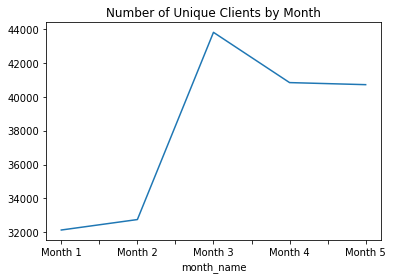

In [81]:
# Plot the number of unique clients by month
df.groupby('month_name').client_id.nunique().plot(kind='line', title='Number of Unique Clients by Month')

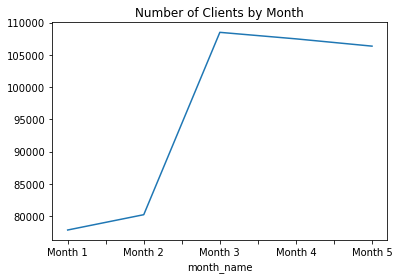

In [82]:
# Plot the number of clients by month
df.groupby('month_name').client_id.count().plot(kind='line', title='Number of Clients by Month')

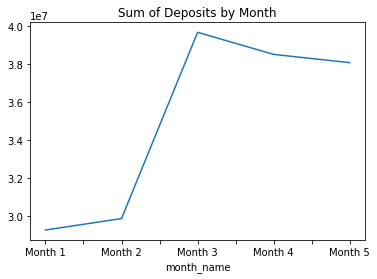

In [83]:
# Plot the sum of deposits that occurred each month
df.groupby('month_name').deposit_amount.sum().plot(kind='line', title='Sum of Deposits by Month')

In [90]:
# View the change in deposits from month to month
df.groupby('month_name').deposit_amount.sum().diff()

month_name
Month 1           NaN
Month 2     601600.41
Month 3    9788625.83
Month 4   -1159237.37
Month 5    -434644.50
Name: deposit_amount, dtype: float64

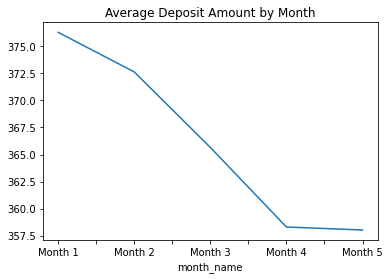

In [ ]:
# Plot average deposit amount by month
df.groupby('month_name').deposit_amount.mean().plot(kind='line', title='Average Deposit Amount by Month')

In [ ]:
# Show summary statistics for deposit amount
df['deposit_amount'].describe()


count    480394.000000
mean        365.207130
std         346.644434
min           0.010000
25%         200.000000
50%         290.000000
75%         452.000000
max       30000.000000
Name: deposit_amount, dtype: float64

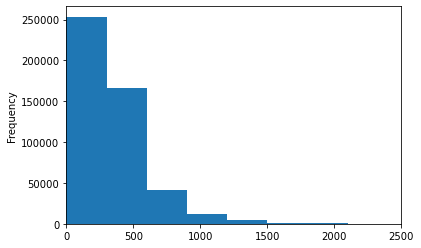

In [ ]:
# View the distribution of deposit amount
# Adjust the x-axis to see the distribution
df['deposit_amount'].plot.hist(bins=100, xlim=(0, 2500))

In [ ]:
# Show columns that have depost_amount > 2500
large_deposits_df = df[df['deposit_amount'] > 2500]
large_deposits_df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.00,Extra,2019-07-11,Month 2
1078,309314840969939,South,Rent,64,Actual Deposit,6050.00,Extra,2019-07-11,Month 2
1208,372381734976030,Midwest,Own,74,Actual Deposit,3547.45,Extra,2019-07-11,Month 2
1495,92778941514814,West,Rent,34,Actual Deposit,4130.00,Monthly,2019-10-19,Month 5
1496,92778941514814,West,Rent,34,Scheduled Deposit,4130.00,Monthly,2019-10-19,Month 5


In [ ]:
# Show the number of clients that made a deposit > 2500
large_deposits_df.client_id.nunique()

407

In [ ]:
# Create new dataframe where deposit amount < 2500
small_deposits_df = df[df['deposit_amount'] < 2500]
small_deposits_df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2
5,55107102575545,Midwest,Own,83,Actual Deposit,438.0,Monthly,2019-07-11,Month 2


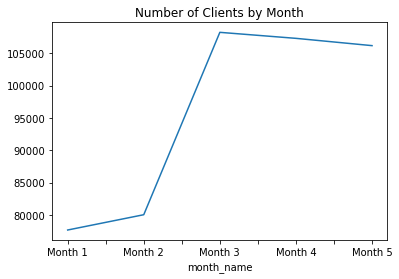

In [ ]:
# Plot the number of clients by month
small_deposits_df.groupby('month_name').client_id.count().plot(kind='line', title='Number of Clients by Month')


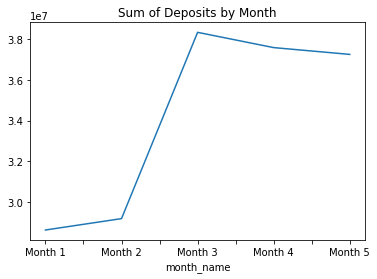

In [ ]:
# Plot the sum of deposits that occurred each month
small_deposits_df.groupby('month_name').deposit_amount.sum().plot(kind='line', title='Sum of Deposits by Month')

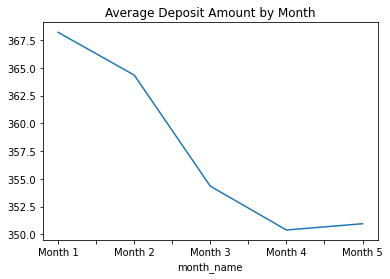

In [ ]:
# Plot average deposit amount by month
small_deposits_df.groupby('month_name').deposit_amount.mean().plot(kind='line', title='Average Deposit Amount by Month')

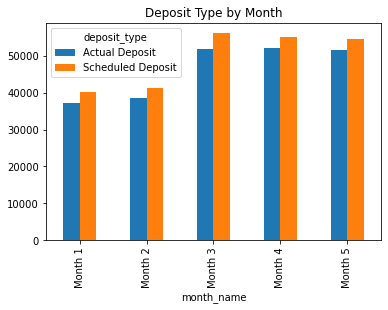

In [ ]:
# Graph deposit_type by month
small_deposits_df.groupby(['month_name', 'deposit_type']).client_id.count().unstack().plot(kind='bar', title='Deposit Type by Month')

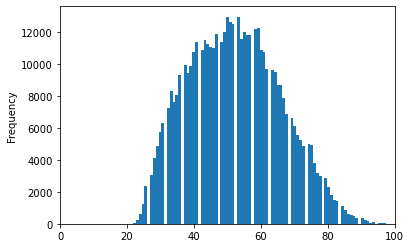

In [ ]:
# View client_age distribution
small_deposits_df['client_age'].plot.hist(bins=100, xlim=(0, 100))

In [ ]:
# Bin client_age into 10 year intervals
small_deposits_df['client_age_bin'] = pd.cut(small_deposits_df['client_age'], 
                                             bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                                             labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

/Users/avatarjoshi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# View dataframe with client_age_bin
small_deposits_df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,client_age_bin
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2,20-30
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2,20-30
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2,80-90
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2,80-90
5,55107102575545,Midwest,Own,83,Actual Deposit,438.0,Monthly,2019-07-11,Month 2,80-90


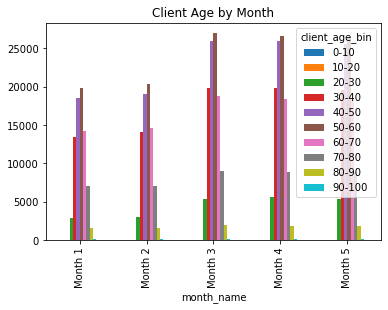

In [ ]:
# Graph client_age_bin by month
small_deposits_df.groupby(['month_name', 'client_age_bin']).client_id.count().unstack().plot(kind='bar', title='Client Age by Month')